# Aggregate Random Forest Analysis
Since random forests are randomized by nature of the algorithm, we will be applying a random forest several times (100) to try and determine the actual importance of individual features

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

In [2]:
africa = pd.read_csv('africa-ML_20-12-30.csv')
africa = africa.dropna('columns')
labels = africa['sahoStatusEHA']
data = africa.drop(columns=['sahoStatusEHA', 'country', 'dayNum', 'christCountry', 'cumCasesLag1', 'cumCasesLag1P100KC', 'cumDeathsLag1', 'ebolaCasesN', 'gdpPerCap', 'geoDiffXdayNum', 'medDocsN']).select_dtypes(['number'])

train_num = 40

training_data = data[0:train_num]
training_labels = list(labels[0:train_num])

test_data = data[train_num:]
test_labels = list(labels[train_num:])

In [4]:
feature_importance = {}
for i in np.arange(100):
    rf = RandomForestClassifier(n_estimators = 20, max_depth=5, criterion='entropy')
    rf.fit(training_data, training_labels)
    predictions = rf.predict(test_data)
    # Collect 10 most important features
    importance = pd.DataFrame({'feature': training_data.columns, 'importance': np.round(rf.feature_importances_, 3)})
    importance.sort_values('importance', ascending=False, inplace=True)
    importance = importance[:10]
    # Assign values to dictionary
    for imp in importance.values:
        if imp[0] not in feature_importance.keys():
            # If the key is not already there then add it
            feature_importance[imp[0]] = [imp[1]]
        else:
            feature_importance[imp[0]].append(imp[1])

In [5]:
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index')
final_features = feature_importance_df.agg(['mean', 'std', 'sem'], axis=1).sort_values('mean', ascending=False)
final_features['95-conf'] = 1.96*final_features['sem']
final_features['99-conf'] = 3*final_features['sem']

print(final_features)

                         mean       std       sem   95-conf   99-conf
tempDiffS            0.205190  0.064784  0.006478  0.012698  0.019435
casesMD              0.171378  0.064804  0.006546  0.012831  0.019639
deathsMD             0.163170  0.059999  0.006000  0.011760  0.018000
cumDeathsLag1P100KC  0.097051  0.051344  0.005187  0.010166  0.015560
geoDiff              0.063000  0.029812  0.003354  0.006574  0.010062
newCases             0.050033  0.023147  0.002964  0.005809  0.008891
muslimPct            0.044086  0.019848  0.002606  0.005108  0.007818
gdpPerCapLn          0.039952  0.016150  0.002051  0.004020  0.006153
ITNETUSERZS          0.038759  0.014677  0.002725  0.005342  0.008176
christPct            0.036375  0.012729  0.001837  0.003601  0.005512
SHDYNMORT            0.034240  0.013566  0.002713  0.005318  0.008139
nonComDis            0.031500  0.006455  0.003227  0.006326  0.009682
envMort              0.031385  0.011479  0.003184  0.006240  0.009551
firstCase           

Text(0, 0.5, 'Importance of Feature (%)')

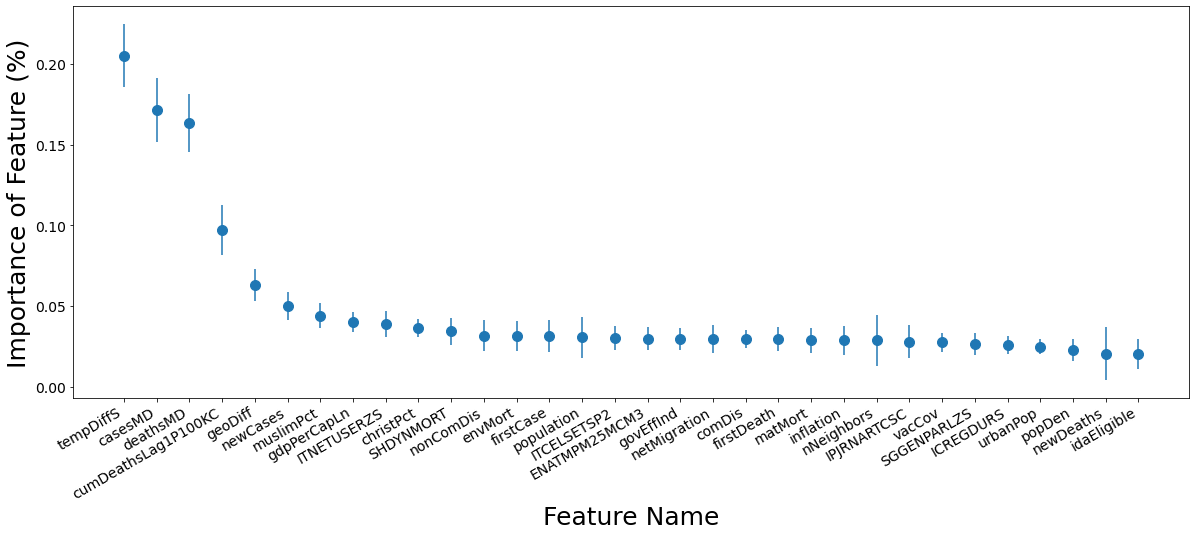

In [6]:
#with plt.xkcd():
fig = plt.figure(figsize=(20,8))
plt.errorbar(final_features.index, 'mean', yerr='99-conf', data=final_features, fmt='o', ms=10)
#plt.xticks(rotation=-60)
fig.autofmt_xdate()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature Name', fontsize=25)
plt.ylabel('Importance of Feature (%)', fontsize=25)
#plt.savefig('Feature-Importance.png')

# Without tempDiffS

In [14]:
data = africa.drop(columns=['sahoStatusEHA', 'dayNum', 'tempDiffS' ,'country', 'tempDiffS', 'christCountry', 'cumCasesLag1', 'cumCasesLag1P100KC', 'cumDeathsLag1', 'ebolaCasesN', 'gdpPerCap', 'geoDiffXdayNum', 'medDocsN']).select_dtypes(['number'])
data = data.drop(columns=['deathsMD', 'cumDeathsLag1P100KC'])
train_num = 40

training_data = data[0:train_num]
training_labels = list(labels[0:train_num])

test_data = data[train_num:]
test_labels = list(labels[train_num:])

In [15]:
feature_importance = {}
for i in np.arange(100):
    rf = RandomForestClassifier(n_estimators = 20, max_depth=5, criterion='entropy')
    rf.fit(training_data, training_labels)
    predictions = rf.predict(test_data)
    # Collect 10 most important features
    importance = pd.DataFrame({'feature': training_data.columns, 'importance': np.round(rf.feature_importances_, 3)})
    importance.sort_values('importance', ascending=False, inplace=True)
    importance = importance[:10]
    # Assign values to dictionary
    for imp in importance.values:
        if imp[0] not in feature_importance.keys():
            # If the key is not already there then add it
            feature_importance[imp[0]] = [imp[1]]
        else:
            feature_importance[imp[0]].append(imp[1])

In [16]:
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index')
final_features = feature_importance_df.agg(['mean', 'std', 'sem'], axis=1).sort_values('mean', ascending=False)
final_features['95-conf'] = 1.96*final_features['sem']

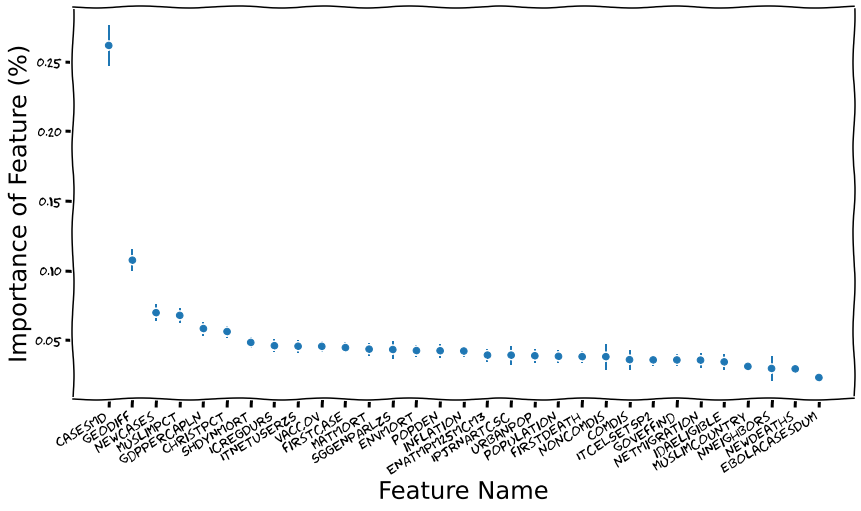

In [17]:
with plt.xkcd():
    fig = plt.figure(figsize=(14,8))
    plt.errorbar(final_features.index, 'mean', yerr='95-conf', data=final_features, fmt='o')
    #plt.xticks(rotation=-60)
    fig.autofmt_xdate()
    plt.xlabel('Feature Name', size='xx-large', fontname='Comic Sans MS')
    plt.ylabel('Importance of Feature (%)', size='xx-large', fontname='Comic Sans MS')
    plt.show()